<a href="https://colab.research.google.com/github/SambhavVinay/ColourPallete_ML/blob/main/ColourPallete_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from google.colab import files

In [15]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [16]:
def get_top_colors(img, n_colors=10):
    pixels = img.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(pixels)
    return kmeans.cluster_centers_

def generate_labels(images):
    labels = np.array([get_top_colors(img) for img in images])
    return labels.reshape(len(images), 30)

In [17]:

print("Generating labels... this may take a while")
y_train = generate_labels(x_train)
y_test  = generate_labels(x_test)


Generating labels... this may take a while


In [18]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(30, activation='sigmoid')   # 5 colors x 3 channels
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         7,710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,286 (907.37 KB)

 Trainable params: 232,286 (907.37 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0476 - val_loss: 0.0429
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0425 - val_loss: 0.0422
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0416 - val_loss: 0.0415
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0410 - val_loss: 0.0414
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0405 - val_loss: 0.0417
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0401 - val_loss: 0.0414
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0397 - val_loss: 0.0415
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0395 - val_loss: 0.0414
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0390 - val_loss: 0.0416
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0387 - val_loss: 0.0420


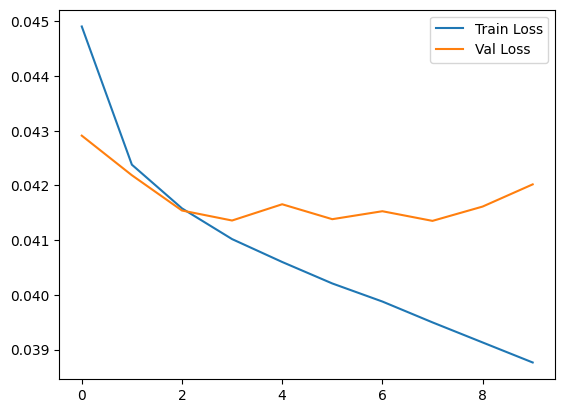

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [21]:
def show_palette(pred_colors):
    pred_colors = pred_colors.reshape(10,3)
    plt.figure(figsize=(10,1))
    for i, color in enumerate(pred_colors):
        plt.fill_between([i, i+1], 0, 1, color=color)
    plt.axis('off')
    plt.show()


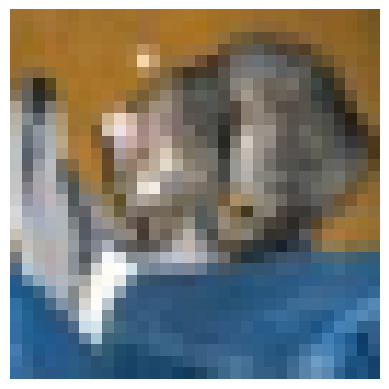

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


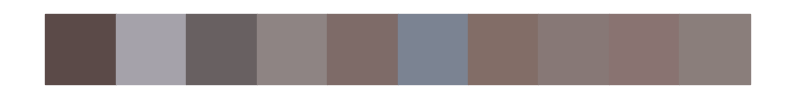

In [27]:
idx = 0
plt.imshow(x_test[idx])
plt.axis('off')
plt.show()
pred = model.predict(x_test[idx][None,...])
show_palette(pred)

Saving Summer_of_Superman_Special_Vol_1_1_Textless.webp to Summer_of_Superman_Special_Vol_1_1_Textless.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


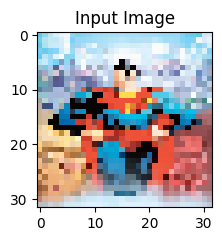

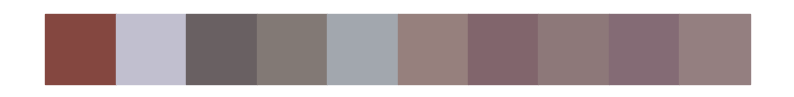

<Figure size 640x480 with 0 Axes>

In [29]:
uploaded = files.upload()

plt.figure(figsize=(10,5))
for i, fn in enumerate(uploaded.keys()):
    img = image.load_img(fn, target_size=(32,32))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0]

    plt.subplot(2, len(uploaded), i + 1)
    plt.imshow(img)

    plt.title("Input Image")

    # Plot predicted palette

    show_palette(pred)
plt.tight_layout()
plt.show()